In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [2]:
# Завантаження
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

# one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(x_train.shape, y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000, 10)


In [4]:
# Створення і компіляція моделі
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='sigmoid'),
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Архітектура мережі
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7343 - loss: 0.7796 - val_accuracy: 0.8138 - val_loss: 0.4961
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8438 - loss: 0.4334 - val_accuracy: 0.8511 - val_loss: 0.4130
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8658 - loss: 0.3700 - val_accuracy: 0.8632 - val_loss: 0.3833
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8759 - loss: 0.3405 - val_accuracy: 0.8741 - val_loss: 0.3525
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8816 - loss: 0.3226 - val_accuracy: 0.8773 - val_loss: 0.3473
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8883 - loss: 0.3025 - val_accuracy: 0.8823 - val_loss: 0.3318
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8915 - loss: 0.2873 - val_accuracy: 0.8787 - val_loss: 0.3382
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8931 - loss: 0.2844 - val_accuracy: 0.

In [12]:
import matplotlib.pyplot as plt
def plot_result(data):
  history_dict = data.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim(0, 0.5)
  plt.legend()
  plt.show()

  plt.clf()
  val_acc_values = history_dict['val_accuracy']
  plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
  plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim(0.8, 1.0)
  plt.legend()


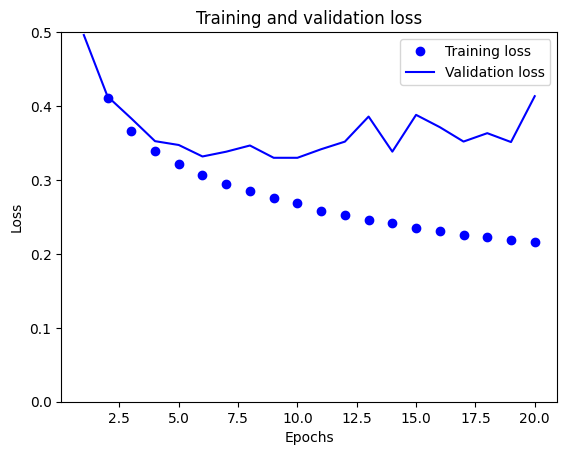

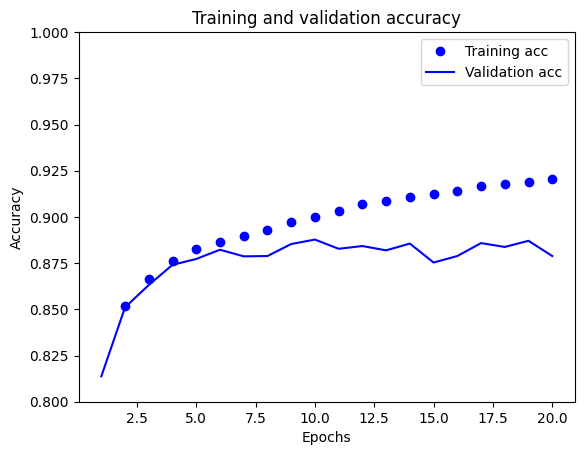

In [13]:
# Візуалізація
plot_result(history)

Висновок:
Втрати і точність на валідаційних даннних не змінються після 6 епохи.
Також у валідаційних даних спостерігаються стрибки. Це може свідчити про перенавчання. Можна спробувати додати регуляцію. Я додам dropout.
Також вихідний шар. Для багатокласової класифікації краще підійде softmax, бо sigmoid обирають зазвичай для бінарних класифікацій.

In [54]:
from keras.layers import Dropout

model2 = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

history2 = model2.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6789 - loss: 0.9149 - val_accuracy: 0.8366 - val_loss: 0.4551
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8273 - loss: 0.4835 - val_accuracy: 0.8414 - val_loss: 0.4365
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8392 - loss: 0.4415 - val_accuracy: 0.8526 - val_loss: 0.4033
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8506 - loss: 0.4186 - val_accuracy: 0.8664 - val_loss: 0.3721
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8538 - loss: 0.4046 - val_accuracy: 0.8673 - val_loss: 0.3677
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8588 - loss: 0.3914 - val_accuracy: 0.8673 - val_loss: 0.3724
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8638 - loss: 0.3784 - val_accuracy: 0.8740 - val_loss: 0.3512
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8684 - loss: 0.3700 - val_accuracy: 0.

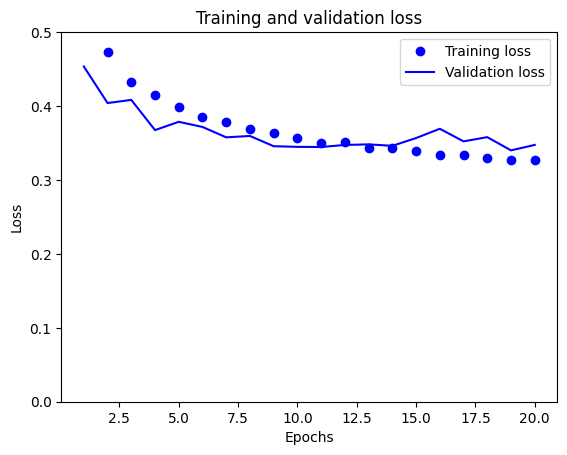

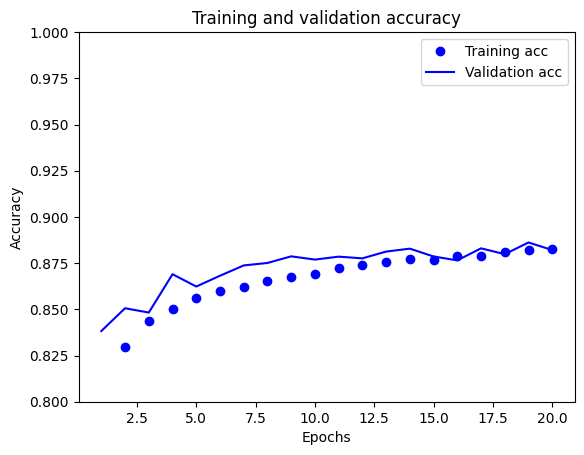

In [15]:
plot_result(history2)

Я позбувся перенавчання. Це видно по тому, що метрики для валідаційних даних покриваються з метриками тренувальних. Тестовим методом належить визначити чи дропаут не завеликий.
Проте точність мережі все ще недостатня. На графіках не спостерігається плато, це свідчить про те, що мережа ще може навчатися.
Варто спробувати дати більше часу, або ускладнити модель додаючи більше нейронів або більше шарів.
Варто теж поексперементувати з різними оптималізаторами. Наприклад adam.

In [62]:
model3 = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

history3 = model3.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7496 - loss: 0.7087 - val_accuracy: 0.8387 - val_loss: 0.4239
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8553 - loss: 0.3986 - val_accuracy: 0.8725 - val_loss: 0.3543
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8708 - loss: 0.3555 - val_accuracy: 0.8638 - val_loss: 0.3834
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8758 - loss: 0.3315 - val_accuracy: 0.8783 - val_loss: 0.3427
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8853 - loss: 0.3080 - val_accuracy: 0.8802 - val_loss: 0.3233
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8924 - loss: 0.2930 - val_accuracy: 0.8773 - val_loss: 0.3304
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8943 - loss: 0.2839 - val_accuracy: 0.8810 - val_loss: 0.3209
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8980 - loss: 0.2744 - val_accuracy: 0.

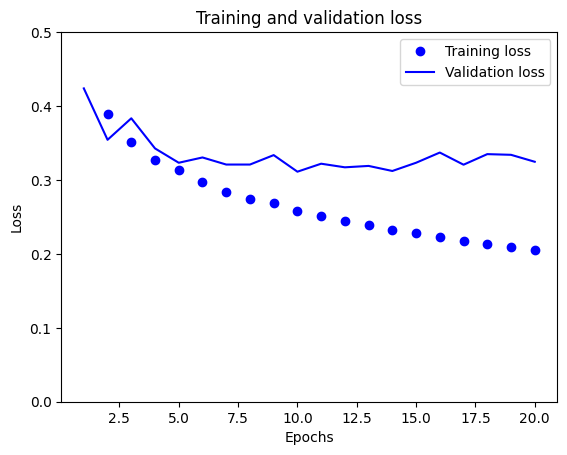

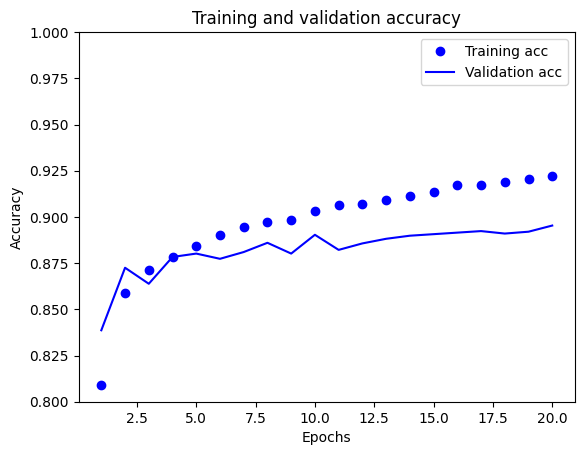

In [72]:
plot_result(history3)

Післямова:
Я протестував дійсно багато гіперпараметрів і їх комбінацій.
- змінював кількість нейронів в шарі
- змінював кількість шарів
- змінював кількість і велечину dropout'ів
- тестував різні оптималізатори з різними learning rates
- пробував використовувати регулятори L2
- пробував нормалізувати данні між шарами за допомогою BatchNormalization
- змінював кількість epochs
- змінюваю велечину batch_size
- використовував колбеки для динамічного learning rates - ReduceLROnPlateau
- використовував колбеки для передчасної зупинки - EarlyStopping

У результаті всіх маніпуляцій мені не вдалося вийти на >91% точності у валідаційних данних. Оця остання модель, яку я залишаю у ноутбуці до здачі ДЗ, це модель, яку мені не вдалось перевершити у точності на валідаційних даних не дивлячись на складніші структури і десятки тестів.

In [79]:
for key, value in history3.history.items():
    print(key, round(value[-1], 2))

accuracy 0.92
loss 0.21
val_accuracy 0.9
val_loss 0.32
